# Demand Forecasting — Exploratory Data Analysis

## Problem Statement
Retail companies need accurate demand forecasts to optimize inventory,
reduce stockouts, and minimize overstock costs.


In [1]:
import sys
sys.executable

'D:\\anaconda3\\envs\\demand-forecast\\python.exe'

In [3]:
import pandas as pd

In [4]:
train_df = pd.read_csv("../data/raw/train.csv")
train_df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


Parse Date

In [6]:
train_df['date'] = pd.to_datetime(train_df['date'])

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


Time Range Check

In [8]:
train_df['date'].min(), train_df['date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

Granularity Check

In [9]:
train_df.groupby(['store', 'item']).size().describe()

count     500.0
mean     1826.0
std         0.0
min      1826.0
25%      1826.0
50%      1826.0
75%      1826.0
max      1826.0
dtype: float64

Global Sales Trend

In [10]:
daily_sales = train_df.groupby('date')['sales'].sum()

<Axes: title={'center': 'Total Daily Sales Over Time'}, xlabel='date'>

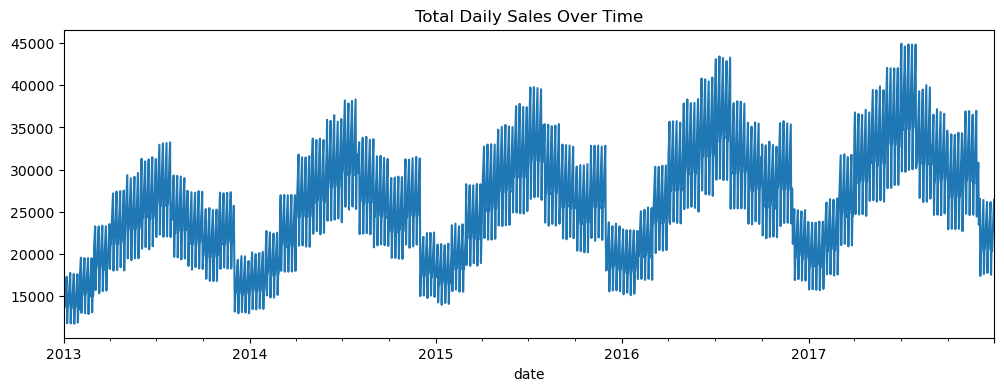

In [15]:
daily_sales.plot(title='Total Daily Sales Over Time', figsize=(12,4))

Sample Store–Item Series

<Axes: title={'center': 'Sales Trend - Store 1, item 1'}, xlabel='date'>

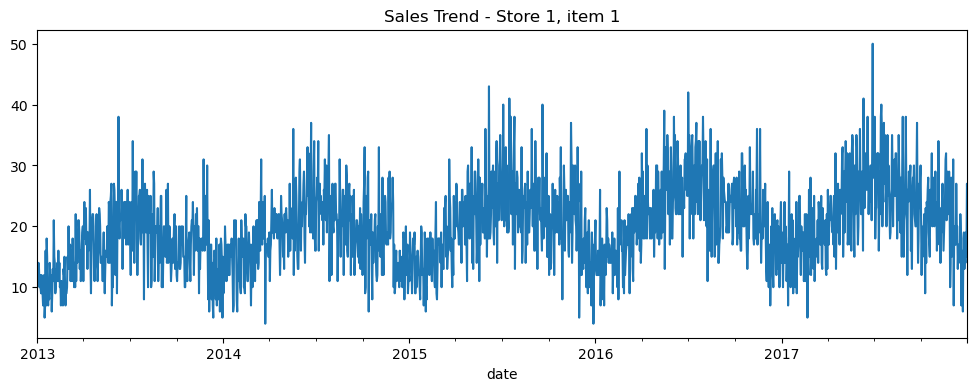

In [16]:
sample_series = train_df[(train_df['store'] == 1) & (train_df['item'] == 1) ]
sample_series.set_index('date')['sales'].plot(title = 'Sales Trend - Store 1, item 1',  figsize=(12,4))

## Key Observations
- The dataset spans five years of daily sales data (2013–2017), suitable for capturing long-term trends and seasonality.
- All store–item combinations have complete and consistent time series with no missing dates.
- Clear yearly seasonality and upward trend are observed in both global sales and individual store–item series.
- The data structure is well-suited for supervised time series forecasting approaches.